In [14]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from config import DATA

# Eplore corrupted data set

In [2]:
# Load the data
data = np.load(DATA["corrupted"])

In [3]:
# Print the shape of the data
data.shape

(126300, 28, 28)

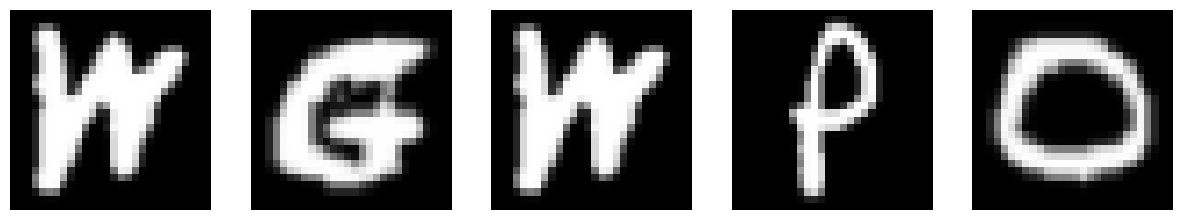

In [4]:
# Print 5 pictures to check dataset
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    axes[i].imshow(data[i], cmap='gray')
    axes[i].axis('off')

plt.show()

It seems like we are working with 126.3k letters represented as 28x28 pixel grey scale images

# Predictions of VAE model

In [11]:
preds = np.load(DATA["corrected"])

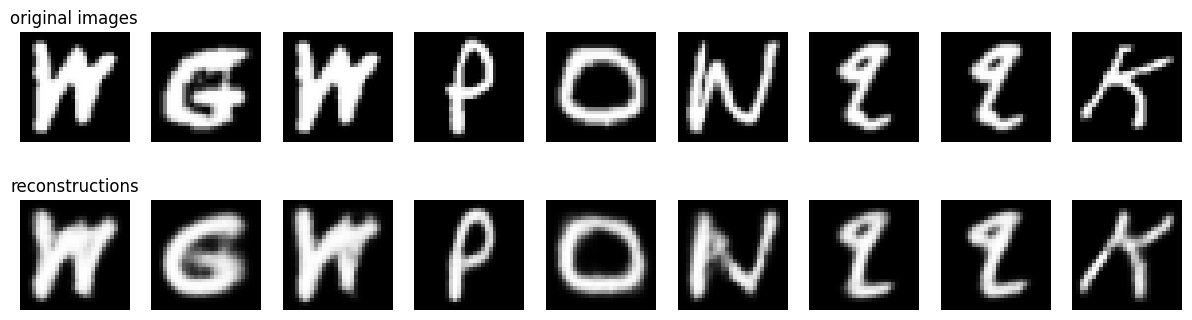

In [13]:
# plot reconstructed vs actual images
fig, axes = plt.subplots(2, 9, figsize=(15, 4))

for i in range(9):
    axes[0][i].imshow(data[i], cmap='gray')
    axes[0][i].axis('off')

    axes[1][i].imshow(preds[i], cmap='gray')
    axes[1][i].axis('off')

axes[0][0].set_title("original images")
axes[1][0].set_title("reconstructions")
plt.show()

# Anomalous masks & scores

In [15]:
# generate masks, i.e. absolute diff of each pixel to original image
masks = []

for pred, true in zip(preds, data):
    masks.append(abs(true-pred))

masks = torch.cat(masks, dim=0)

TypeError: expected Tensor as element 0 in argument 0, but got numpy.ndarray